
https://runkeeper.com/exportDataForm

Not only a rollup table of all your activites, but also individual GPX files containing the geo tracks for each of your trips.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fpath = './data/cardioActivities.csv'
df = pd.read_csv(fpath)

print('Number of activities = {:d}'.format(len(df)))
df.head()

Number of activities = 342


,Date,Type,Route Name,Distance (mi),Duration,Average Pace,Average Speed (mph),Calories Burned,Climb (ft),Average Heart Rate (bpm),Notes,GPX File
0,2015-09-10 22:15:00,Running,NaN,1.00,8:34,8:34,7.00,162.000000,NaN,NaN,Treadmill mile during Patriots halftime.,NaN
1,2015-09-09 23:30:00,Running,NaN,2.00,20:00,10:00,6.00,331.000000,NaN,NaN,Streak++,NaN
2,2015-09-08 22:03:21,Running,NaN,1.00,10:00,10:00,6.00,165.738346,NaN,NaN,Treadmill mile. So hot out today!!,NaN
3,2015-09-07 18:50:18,Running,NaN,1.00,8:45,8:43,6.88,163.000000,13.68,NaN,Getting my mile in after a looong car ride hom...,2015-09-07-1850.gpx
4,2015-09-06 09:18:22,Running,NaN,2.15,27:56,13:00,4.61,338.000000,95.27,NaN,Another trail run. Tox —> detox —> retox.,2015-09-06-0918.gpx


One annoyance is that both total duration and average pace are represented in MM:SS format, so let's recompute these quantities. Next, we'll pull out just the running activities. Also, we're going to drop manually-tracked activities, focusing only on running trips that were recorded using a GPS track.

In [3]:
df['Duration'] = df['Distance (mi)']/df['Average Speed (mph)']*60.0  # Duration in minutes
df['Average Pace'] = 60.0/df['Average Speed (mph)']  # Pace in minutes/mile

df = df[df['Type'] == 'Running']  # Keep only running activies
df = df.dropna(subset=['GPX File'])  # Drop records without a GPX file

print('Number of GPS-tracked running activities = {:d}'.format(len(df)))
df.head()

Number of GPS-tracked running activities = 154


,Date,Type,Route Name,Distance (mi),Duration,Average Pace,Average Speed (mph),Calories Burned,Climb (ft),Average Heart Rate (bpm),Notes,GPX File
3,2015-09-07 18:50:18,Running,NaN,1.00,8.720930,8.720930,6.88,163,13.68,NaN,Getting my mile in after a looong car ride hom...,2015-09-07-1850.gpx
4,2015-09-06 09:18:22,Running,NaN,2.15,27.982646,13.015184,4.61,338,95.27,NaN,Another trail run. Tox —> detox —> retox.,2015-09-06-0918.gpx
5,2015-09-05 13:22:51,Running,NaN,2.38,28.165680,11.834320,5.07,392,108.91,NaN,Trail run around French Creek State Park.,2015-09-05-1322.gpx
6,2015-09-04 08:52:33,Running,NaN,4.00,34.682081,8.670520,6.92,658,70.08,NaN,A few miles before heading out for the holiday...,2015-09-04-0852.gpx
7,2015-09-03 22:19:41,Running,NaN,1.00,8.836524,8.836524,6.79,162,13.66,NaN,"Ran out of time today, only got a mile in. Leg...",2015-09-03-2219.gpx


Let's take a running window, and over each window we'll.  Let's bin the data and only keep 

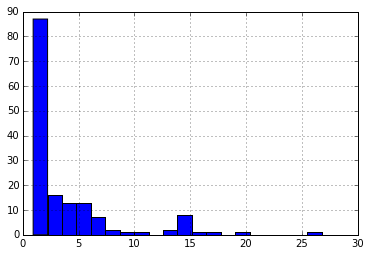

In [30]:
df['Distance (mi)'].hist(bins=20)

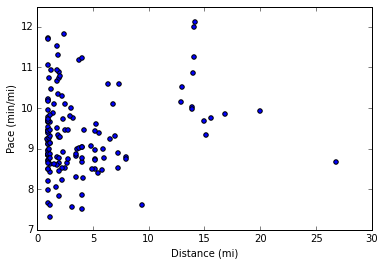

In [27]:
plt.scatter(df['Distance (mi)'], df['Average Pace'])
plt.xlim(0, 30)
plt.xlabel('Distance (mi)')
plt.ylim(7, 12.5)
plt.ylabel('Pace (min/mi)')
plt.show()

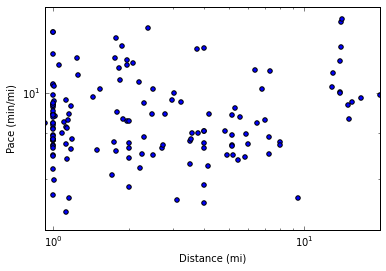

In [28]:
plt.scatter(df['Distance (mi)'], df['Average Pace'])
plt.xscale('log')
plt.xlim(0, 20)
plt.xlabel('Distance (mi)')
plt.yscale('log')
plt.ylim(7, 12.5)
plt.ylabel('Pace (min/mi)')
plt.show()

In [20]:
df.max()

Date                                                      2015-09-07 18:50:18
Type                                                                  Running
Route Name                                              Watertown Quick Run 2
Distance (mi)                                                            26.8
Duration                                                             329.0323
Average Pace                                                         32.25806
Average Speed (mph)                                                      8.19
Calories Burned                                                          4583
Climb (ft)                                                             980.85
Average Heart Rate (bpm)                                                  NaN
Notes                       Weekend long run. Cold and damp, but minimal w...
GPX File                                                  2015-09-07-1850.gpx
dtype: object